In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv('../../placement.csv')
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


# Distribution Plot of cgpa and placement_exam_marks


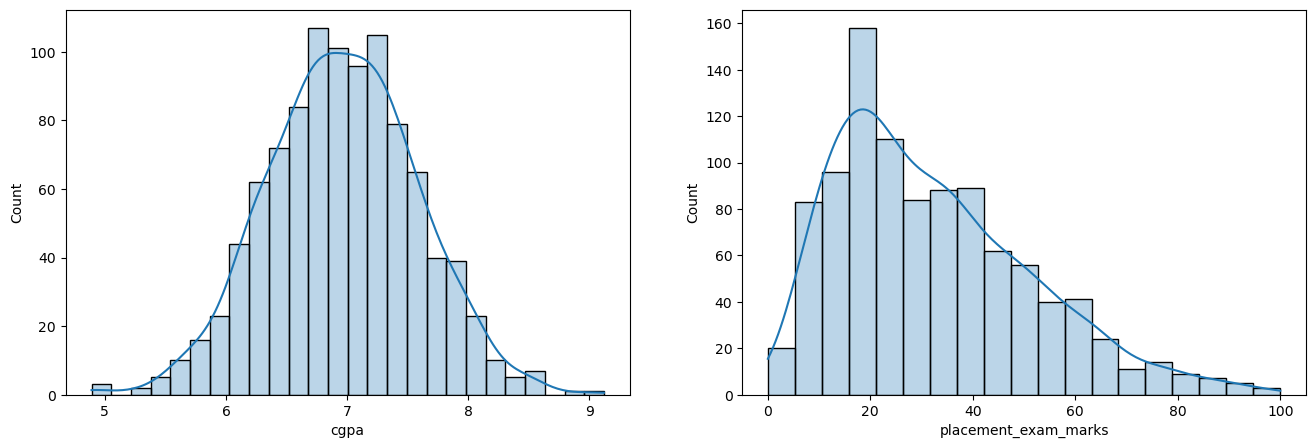

In [14]:
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.histplot(df['cgpa'], kde='true', alpha=0.3)

plt.subplot(122)
sns.histplot(df['placement_exam_marks'], kde='true', alpha=0.3)

plt.show()

### Observations:
- **CGPA** is following a normal distribution.
- **Placement exam marks** is right-skewe
<p>we can not apply zscore and normal distribution metho on "placement_exam_marksng</p>.


# Calculation of Outliers by basic understanding of Normally distributed data

In [17]:
# Finding mean, std, min and max
print("Mean value of cgpa: ",df['cgpa'].mean())
print("Std of cgpa: ",df['cgpa'].std())
print("Min value of cgpa: ",df['cgpa'].min())
print("Max value of cgpa: ",df['cgpa'].max())

Mean value of cgpa:  6.96124
Std of cgpa:  0.6158978751323894
Min value of cgpa:  4.89
Max value of cgpa:  9.12


In [18]:
#Finding boundary value (mean + 3 x std)
print("Highest allowed: ",df['cgpa'].mean() + 3*df['cgpa'].std())
print("Lowest allowed: ",df['cgpa'].mean() - 3*df['cgpa'].std())

Highest allowed:  8.808933625397168
Lowest allowed:  5.113546374602832


In [20]:
# Finding the outliers
df[(df['cgpa']>8.80) | (df['cgpa']<5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


# Handling Technique: Trimming

In [24]:
#Trimming
new_def=df[(df['cgpa']<8.80) & (df['cgpa']>5.11)]
new_def.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


5 rows with outliers are not taken in the new dataframe

In [26]:
new_def.shape

(995, 3)

## calculation of z-score

In [27]:
df['cgpa_zscore']=(df['cgpa']-df['cgpa'].mean())/df['cgpa'].std()

In [28]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [31]:
df[(df['cgpa_zscore']>3) | (df['cgpa_zscore']<-3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


# Handling Technique: Capping

In [35]:
# calculating upperlimit and lowerlimit
upper_limit= df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit= df['cgpa'].mean() - 3*df['cgpa'].std()
print("Upper limit: ", upper_limit)
print("Lower limit: ", lower_limit)

Upper limit:  8.808933625397168
Lower limit:  5.113546374602832


In [36]:
df['cgpa']= np.where(df['cgpa']>upper_limit, upper_limit, 
                    np.where(df['cgpa']<lower_limit, lower_limit, df['cgpa'])
                    )

In [37]:
df.shape

(1000, 4)

The shape of dataframe is still intact , we have just updated outliers with upper and lower limit values

In [38]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64